In [146]:
import pandas as pd

london_air = pd.read_csv("LaqnData.csv")
london_air.head()

Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  MW2      NO  01/01/2019 00:00    6.2  ug m-3                       R
1  MW2      NO  01/01/2019 00:15    8.4  ug m-3                       R
2  MW2      NO  01/01/2019 00:30    9.2  ug m-3                       R
3  MW2      NO  01/01/2019 00:45    NaN  ug m-3                       R
4  MW2      NO  01/01/2019 01:00    NaN  ug m-3                       R

In [147]:
london_air.describe()

Value
count  108898.000000
mean       40.785833
std        50.246224
min       -10.900000
25%        11.300000
50%        25.600000
75%        51.700000
max       790.400020

In [148]:
london_air['Provisional or Ratified'].unique()

array(['R', 'P'], dtype=object)

In [149]:
london_air['Species'].unique()

array(['NO', 'NO2', 'NOX'], dtype=object)

In [150]:
london_air['Species'].describe()

count     114048
unique         3
top          NO2
freq       38016
Name: Species, dtype: object

In [151]:
london_air['Site'].unique()

array(['MW2'], dtype=object)

In [152]:
london_air['ReadingDateTime'].unique()

array(['01/01/2019 00:00', '01/01/2019 00:15', '01/01/2019 00:30', ...,
       '31/01/2020 23:15', '31/01/2020 23:30', '31/01/2020 23:45'],
      dtype=object)

In [153]:
london_air['Units'].unique()

array(['ug m-3', 'ug m-3 as NO2'], dtype=object)

In [154]:
london_air['Value'].unique()

array([  6.2,   8.4,   9.2, ...,  -5.3, -10. ,  -9.4])

In [155]:
london_air.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [156]:
column_names = london_air.columns
for i in column_names:
  print('{} is unique: {}'.format(i, london_air[i].is_unique))

Site is unique: False
Species is unique: False
ReadingDateTime is unique: False
Value is unique: False
Units is unique: False
Provisional or Ratified is unique: False


 i = london_air.columns
for column in i:
    if column.is_unique:
        print("this is unique {}".format(column))

In [157]:
import numpy as np
london_air.index.values

array([     0,      1,      2, ..., 114045, 114046, 114047])

In [158]:
print(london_air.isnull().values.any())


True


In [159]:
#print(london_air.columns[london_air.isna().any()].tolist())
print(london_air.columns[london_air.isnull().any()].tolist())

['Value']


In [160]:
london_air['Value'] = london_air['Value'].fillna(0)

In [161]:
london_air.isnull().any()

Site                       False
Species                    False
ReadingDateTime            False
Value                      False
Units                      False
Provisional or Ratified    False
dtype: bool

In [162]:
london_air

Site Species   ReadingDateTime  Value          Units  \
0       MW2      NO  01/01/2019 00:00    6.2         ug m-3   
1       MW2      NO  01/01/2019 00:15    8.4         ug m-3   
2       MW2      NO  01/01/2019 00:30    9.2         ug m-3   
3       MW2      NO  01/01/2019 00:45    0.0         ug m-3   
4       MW2      NO  01/01/2019 01:00    0.0         ug m-3   
...     ...     ...               ...    ...            ...   
114043  MW2     NOX  31/01/2020 22:45   14.7  ug m-3 as NO2   
114044  MW2     NOX  31/01/2020 23:00   10.5  ug m-3 as NO2   
114045  MW2     NOX  31/01/2020 23:15    7.2  ug m-3 as NO2   
114046  MW2     NOX  31/01/2020 23:30    7.6  ug m-3 as NO2   
114047  MW2     NOX  31/01/2020 23:45    7.8  ug m-3 as NO2   

       Provisional or Ratified  
0                            R  
1                            R  
2                            R  
3                            R  
4                            R  
...                        ...  
114043                       P  
114044                       P  
114045                       P  
114046                       P  
114047                       P  

[114048 rows x 6 columns]

In [163]:
london_air.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [107]:
from datetime import datetime

london_air['ReadingDateTime'] = london_air['ReadingDateTime'].map(lambda x: datetime.strptime(x, '%d/%m/%y %H:%M'))

In [164]:
london_air.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [165]:
london_air['Species'].str.upper()

0          NO
1          NO
2          NO
3          NO
4          NO
         ... 
114043    NOX
114044    NOX
114045    NOX
114046    NOX
114047    NOX
Name: Species, Length: 114048, dtype: object

In [166]:
london_air.duplicated().values.any()

False

In [167]:
london_air.drop(['Site'], axis = 1)

Species   ReadingDateTime  Value          Units Provisional or Ratified
0           NO  01/01/2019 00:00    6.2         ug m-3                       R
1           NO  01/01/2019 00:15    8.4         ug m-3                       R
2           NO  01/01/2019 00:30    9.2         ug m-3                       R
3           NO  01/01/2019 00:45    0.0         ug m-3                       R
4           NO  01/01/2019 01:00    0.0         ug m-3                       R
...        ...               ...    ...            ...                     ...
114043     NOX  31/01/2020 22:45   14.7  ug m-3 as NO2                       P
114044     NOX  31/01/2020 23:00   10.5  ug m-3 as NO2                       P
114045     NOX  31/01/2020 23:15    7.2  ug m-3 as NO2                       P
114046     NOX  31/01/2020 23:30    7.6  ug m-3 as NO2                       P
114047     NOX  31/01/2020 23:45    7.8  ug m-3 as NO2                       P

[114048 rows x 5 columns]

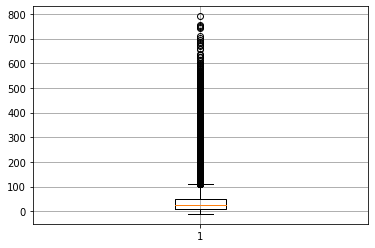

In [168]:
# import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(london_air['Value'].values)
plt.grid( linestyle='-', linewidth=1)
plt.show()

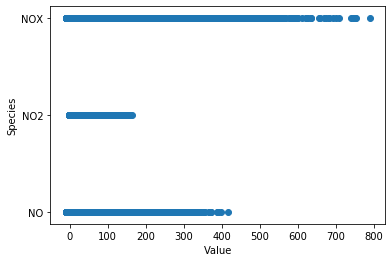

In [169]:
plt.scatter(london_air['Value'],london_air['Species'])
plt.xlabel("Value")
plt.ylabel("Species")
plt.show()

In [170]:

london_air['Value'] = london_air['Value'].between(london_air['Value'].quantile(.25), london_air['Value'].quantile(.75))
london_air['Value'].values.any()

True

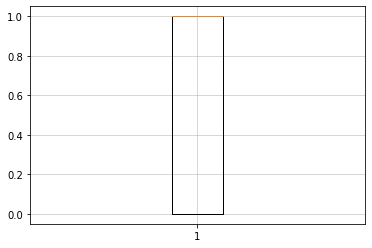

In [173]:
plt.boxplot(london_air['Value'].values)
plt.grid( linestyle='-', linewidth=0.5)
plt.show()